In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import cv2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('..\\Spyder'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from Spyder import tsne

In [4]:
from sklearn.decomposition import PCA

In [5]:
from sklearn.neighbors import NearestNeighbors
def get_nn_class(X, y):
    neigh = NearestNeighbors(n_neighbors=2, algorithm='brute')
    neigh.fit(X)
    ids = neigh.kneighbors(X, return_distance=False)
    ids = ids[:,1]
    y_nn_class = y.reset_index().label[ids]
    return y_nn_class.values

## Load Olivetti faces data set

In [6]:
## Load Olivetti faces data set
X = pd.read_csv(r"./dataset/Olivetti/train_Olivetti.csv", header=None)
y = pd.read_csv(r"./dataset/Olivetti/label_Olivetti.csv", names=['label']).astype(int)

In [7]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


In [8]:
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [9]:
y.shape

(400, 1)

In [10]:
X.shape

(400, 4096)

show random sample of 64 images:

In [11]:
random_sample_idxs = y.sample(64).index

In [12]:
X_sample = X.iloc[random_sample_idxs,:]
y_sample = y.iloc[random_sample_idxs,:]

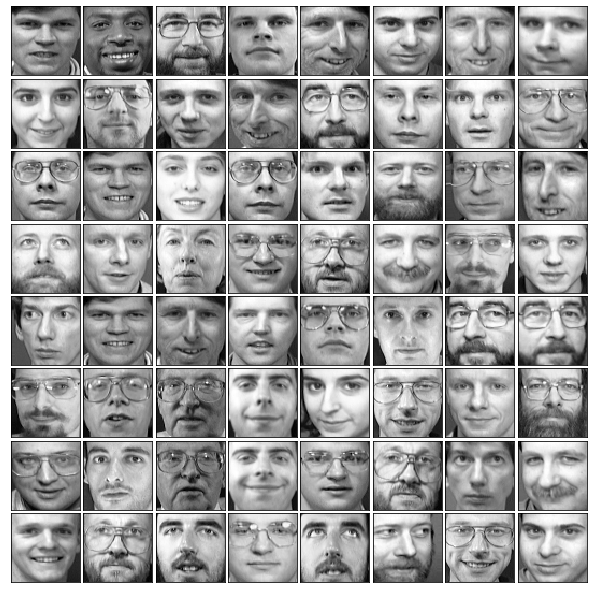

In [13]:
# initial visualization
fig = plt.figure(figsize= (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(random_sample_idxs)):
    plt.subplot(8,8,i+1)
    plt.imshow(X_sample.iloc[i,:].values.reshape(64,-1), cmap = plt.cm.gray, interpolation='nearest')
    #plt.text(x= 0.08, y = 3.5, s = y_sample.iloc[i, 0])
    plt.xticks([]),  plt.yticks([])

## Run TSNE on Olivetti data

Reduce input data to 30 dimension by using PCA

In [16]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X.values)

Run scikit-learn exact method

In [17]:
tsne_sl = TSNE(n_components = 2, perplexity = 40, method = "exact", early_exaggeration=4.0, random_state = 1, verbose = 1)

In [18]:
X_tsne_sl = tsne_sl.fit_transform(X_pca)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 3.703065
[t-SNE] KL divergence after 250 iterations with early exaggeration: 12.896660
[t-SNE] KL divergence after 1000 iterations: 0.417528


In [23]:
numbers = y.label.unique()

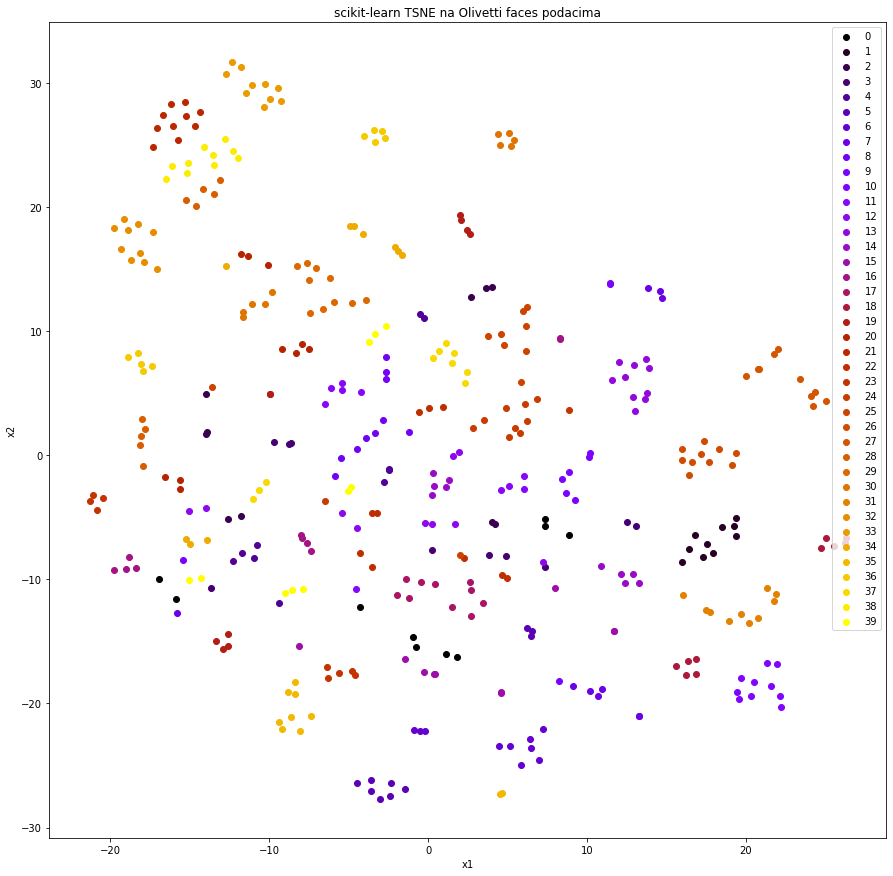

In [24]:
number = 40
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
plt.figure(figsize = (15,15))
for i, number in enumerate(numbers):
    plt.scatter(X_tsne_sl[y.label == number,0], X_tsne_sl[y.label == number,1], color = colors[i])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('scikit-learn TSNE na Olivetti faces podacima')
plt.legend(numbers)
plt.show()

Run implemented exact method

In [25]:
X_tsne = tsne.TSNE(X_pca, n_components = 2, perplexity = 40, n_iter = 1000, early_exaggeration = 4.0, method = "exact", random_state = 1, verbose = 1)

[t-SNE] Mean sigma: 3.7030650508598493
[t-SNE] KL divergence after 250 iterations: 12.893461271462913
[t-SNE] KL divergence after 1000 iterations: 0.41749124626035283


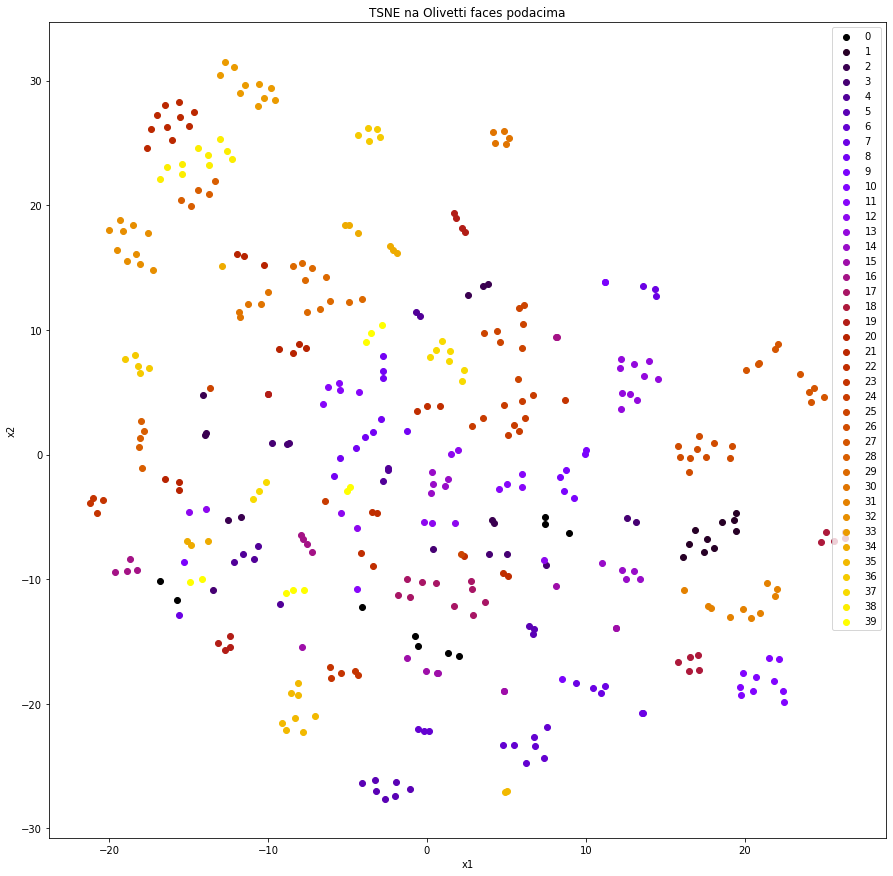

In [26]:
number = 40
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
plt.figure(figsize = (15,15))
for i, number in enumerate(numbers):
    plt.scatter(X_tsne[y.label == number,0], X_tsne[y.label == number,1], color = colors[i])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('TSNE na Olivetti faces podacima')
plt.legend(numbers)
plt.show()

Nearest Neighbors error

In [27]:
y_true = get_nn_class(X.values, y)
y_pred_tsne_sl = get_nn_class(X_tsne_sl, y)
y_pred_tsne = get_nn_class(X_tsne, y)
print('Err true - tsne_sl',(y_true!=y_pred_tsne_sl).sum()/len(y_true))
print('Err true - tsne',(y_true!=y_pred_tsne).sum()/len(y_true))

Err true - tsne_sl 0.05
Err true - tsne 0.05


## Run Barnes-Hut-SNE on Olivetti data

Reduce input data to 30 dimension by using PCA

In [28]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X.values)

Run scikit-learn barnes_hut method

In [29]:
tsne_sl_bh = TSNE(n_components = 2, perplexity = 40, method = "barnes_hut", early_exaggeration=12.0, random_state = 1, verbose = 1)

In [30]:
X_tsne_sl_bh = tsne_sl_bh.fit_transform(X_pca)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 3.825449
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.260437
[t-SNE] KL divergence after 1000 iterations: 0.520282


In [31]:
numbers = y.label.unique()

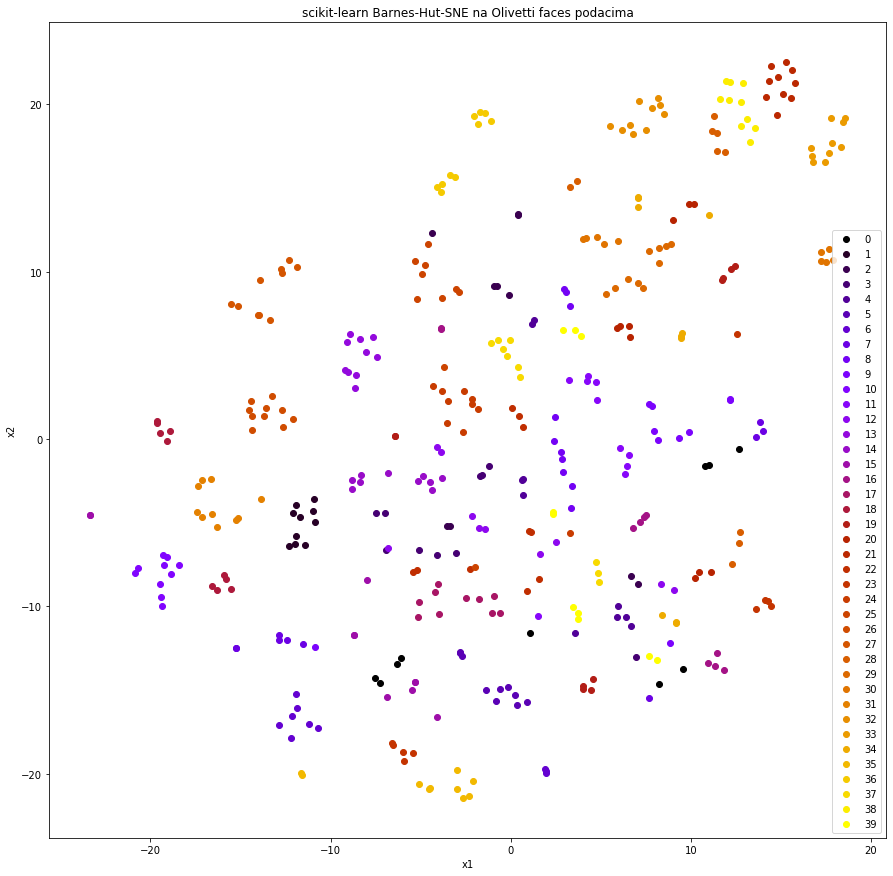

In [33]:
number = 40
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
plt.figure(figsize = (15,15))
for i, number in enumerate(numbers):
    plt.scatter(X_tsne_sl_bh[y.label == number,0], X_tsne_sl_bh[y.label == number,1], color = colors[i])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('scikit-learn Barnes-Hut-SNE na Olivetti faces podacima')
plt.legend(numbers)
plt.show()

Run implemented barnes_hut method

In [34]:
X_tsne_bh = tsne.TSNE(X_pca, n_components = 2, perplexity = 40, n_iter = 1000, early_exaggeration = 12.0, method = "barnes_hut", random_state = 1, verbose = 1)

[t-SNE] Mean sigma: 3.8254492474972257
[t-SNE] KL divergence after 250 iterations: 62.43702430278063
[t-SNE] KL divergence after 1000 iterations: 0.5494171978020859


<Figure size 1080x1080 with 0 Axes>

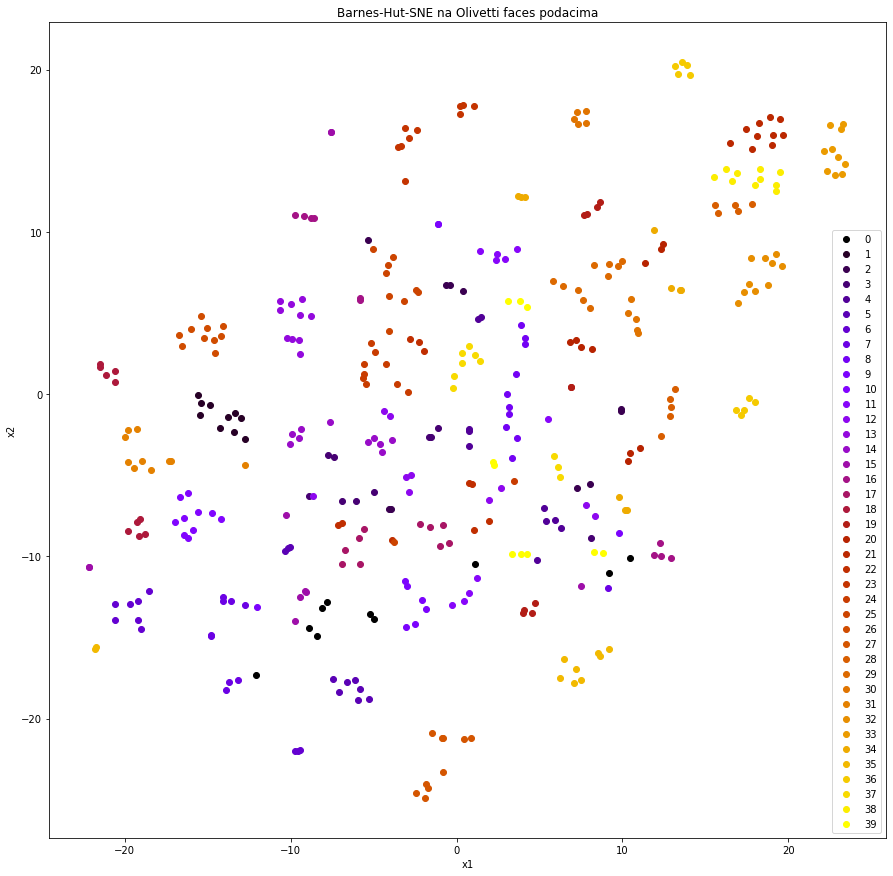

In [39]:
number = 40
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
plt.figure(figsize = (15,15))
for i, number in enumerate(numbers):
    plt.scatter(X_tsne_bh[y.label == number,0], X_tsne_bh[y.label == number,1],  color = colors[i])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Barnes-Hut-SNE na Olivetti faces podacima')
plt.legend(numbers)
plt.show()

Nearest Neighbors error

In [40]:
y_true = get_nn_class(X.values, y)
y_pred_tsne_sl_bh = get_nn_class(X_tsne_sl_bh, y)
y_pred_tsne_bh = get_nn_class(X_tsne_bh, y)
print('Err true - tsne_sl_bh',(y_true!=y_pred_tsne_sl_bh).sum()/len(y_true))
print('Err true - tsne_bh',(y_true!=y_pred_tsne_bh).sum()/len(y_true))

Err true - tsne_sl_bh 0.0425
Err true - tsne_bh 0.045
